In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### 一维空间上的牛顿法（Newton's method in 1 dimension）


这里要对 $f$ 进行泰勒展开（Taylor expansion），然后去掉所有二次和更高阶的项，牛顿法的形式就简化成了：

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

In [2]:
def newton(f, fprime, x, tol=1e-6, max_iter=1e4):
    _iter = 0
    _tol = np.infty
    while (_tol > tol) and (_iter < max_iter):
        _x = x - f(x)/fprime(x)
        _tol = abs(x - _x)
        _iter += 1
        x = _x
    if _tol <= tol:
        return x
    else:
        return None

In [3]:
def f(x):
    return x**3 + 4*x**2 -3

def fprime(x):
    return 3*x**2 + 8*x

In [4]:
x1_0 = 2.5
x1 = newton(f, fprime, x1_0)

In [5]:
x2_0 = -3.3
x2 = newton(f, fprime, x2_0)

In [6]:
x3_0 = -0.5
x3 = newton(f, fprime, x3_0)

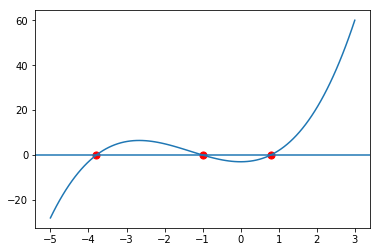

In [7]:
x = np.linspace(-5, 3, 100)
plt.plot(x, x**3 + 4*x**2 -3)
plt.scatter([x1_0, x2_0, x3_0], [f(x1_0), f(x2_0), f(x3_0)], s=50, facecolors='none')
plt.scatter([x1, x2, x3], [f(x1), f(x2), f(x3)], s=50, c='red')
plt.axhline(0);

#### 牛顿法的稳定性（Stability of Newton's method）

这部分涉及到的概念有收敛速率（convergence rate）、稳定调节（conditions for stability），对于收敛失败的样例，可以使用一个步长调节参数（step size tuning parameter）$\alpha$

$$
x_{n+1} = x_n - \alpha \frac{f(x_n)}{f'(x_n)}
$$

### 高斯-牛顿算法（Gauss-Newton algorithm）

对于一维空间的牛顿法是：
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$


可以用如下的形式来将其泛化到 k 维度空间：
$$
x_{n+1} = x_n - J^{-1} f(x_n)
$$

其中的 $x$ 和 $f(x)$ 现在就是向量了，而 $J^{-1}$ 是一个逆雅可比矩阵（inverse Jacobian matrix）。通常，雅可比矩阵（Jacobian）并不是一个正方形矩阵（square matrix），这里用一个泛化的逆矩阵 $(J^TJ)^{-1}J^T$ 来替代，则有：

$$
x_{n+1} = x_n - (J^TJ)^{-1}J^T f(x_n)
$$


牛顿法一般都被看作一种求根方法（root finder）。然而，要注意将牛顿法用于一个可微函数的导函数找到使导数为零 $f'(x) = 0$的 $x$，给出了可微函数（differentialble function) $f$的固定点(stationary points)。因此，牛顿法也可以直接用于优化问题。例如，考虑要讲一个关于$\beta$的函数$1/2 r(\beta)^2$最小化。关于$\beta$的导数则为$r(\beta)$。因此，使用牛顿法来找到函数$r(\beta)$的跟，就可以给出能够使得$1/2 r(\beta)^2$最小化的 $\beta$值，这也表明了牛短发和最小二乘估计之间的关联。在多元非线性的估计问题中，可以通过使残差（residuals）$r(\beta)$ 最小化的方法来得到参数向量 $\beta$。

$$
\beta_{n+1} = \beta_n - (J^TJ)^{-1}J^T r(\beta_n)
$$

其中雅可比矩阵 $J$ 的项为：
$$
J_{ij} = \frac{\partial r_i(\beta)}{\partial \beta_j}
$$

#### 根据 [Wikipedia](http://en.wikipedia.org/wiki/Gauss%E2%80%93Newton) 改写来的样例


这个样例适用于拟合广义非线性模型（general nonlinear model）的过程。假设我们有俩一个模型，其残差（residuals）为：

$$
r(\beta_1, \beta_2) = y_i - \frac{\beta_1 x_i}{\beta_2 + x_i}
$$


其中的索引项目 $i$ 表示的是第 $i$ 次观察（$i^\text{th}$）。

这样得到了雅可比矩阵（Jacobian）$\frac{\partial r_i}{\partial \beta_j}$该矩阵是一个 $i \times 2$ 矩阵。设我们进行了三次观测，得到了 $x_1, x_2, x_3$。则雅可比矩阵为：
$$
\left( \begin{array}{cc}
-\frac{x_1}{\beta_2 + x_1} & \frac{\beta_1 x_1}{(\beta_2 + x_1)^2} \\
-\frac{x_2}{\beta_2 + x_2} & \frac{\beta_1 x_2}{(\beta_2 + x_2)^2}  \\
-\frac{x_3}{\beta_2 + x_3} & \frac{\beta_1 x_3}{(\beta_2 + x_3)^2} \end{array} \right)
$$

In [8]:
from numpy import dot
from scipy.linalg import pinv, norm

def gauss_newton(r, J, beta, tol=1e-6, max_iter=1e4):
    _tol = np.infty
    _iter = 0
    while (_tol > tol) and (_iter < max_iter):
        _beta = beta - dot(pinv(J(beta)), r(beta))
        _tol = norm(beta - _beta)
        _iter += 1
        beta = _beta
    if _tol <= tol:
        return beta
    else:
        return None

/Users/cycleuser/.pyenv/versions/2.7.13/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


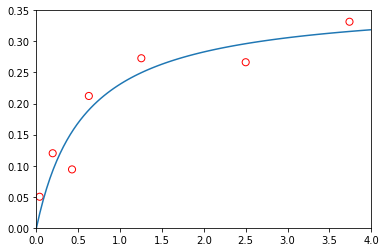

In [9]:
x = np.array([0.038, 0.194, 0.425, 0.626, 1.253, 2.500, 3.740 ])
y = np.array([0.050, 0.12, 0.094, 0.2122, 0.2729, 0.2665, 0.3317])

def r(beta, x=x, y=y):
    return y - (beta[0]*x)/(beta[1] + x)

def J(beta, x=x):
    return np.array([-x/(beta[1] + x), (beta[0] *x)/(beta[1] + x)**2]).T

def f(x, beta):
    return (beta[0]*x)/(beta[1] + x)

beta = [0.9, 0.2]
beta = gauss_newton(r, J, beta)

xs = np.linspace(0, 4, 100)
plt.plot(xs, f(xs, beta))
plt.scatter(x, y, s=50,edgecolors='red', facecolors='none')
plt.axis([0, 4, 0, 0.35]);